<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Embeddings" data-toc-modified-id="Embeddings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Embeddings</a></span><ul class="toc-item"><li><span><a href="#PCA-illustration-of-getting-embeddings" data-toc-modified-id="PCA-illustration-of-getting-embeddings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCA illustration of getting embeddings</a></span></li><li><span><a href="#Supervised-example" data-toc-modified-id="Supervised-example-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Supervised example</a></span></li><li><span><a href="#Word-embeddings" data-toc-modified-id="Word-embeddings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Word embeddings</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Skip-gram-predicts-surrounding-words-given-the-current-word." data-toc-modified-id="Skip-gram-predicts-surrounding-words-given-the-current-word.-1.3.0.1"><span class="toc-item-num">1.3.0.1&nbsp;&nbsp;</span>Skip-gram predicts surrounding words given the current word.</a></span></li><li><span><a href="#CBOW-predicts-next-word-given-surronding-words." data-toc-modified-id="CBOW-predicts-next-word-given-surronding-words.-1.3.0.2"><span class="toc-item-num">1.3.0.2&nbsp;&nbsp;</span>CBOW predicts next word given surronding words.</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Embeddings

*In this context* an embedding is a numerical representation of non-numerical data. The purpose is primarily for mathematical convenience i.e. it enables computations to may be made. For example: One Hot encoder encodes a categorical variable with 6 possible values for its value '3' to 0 0 1 0 0 0. In real life this may mean hair color 'blond'. For the complete picture:

Color  |  encoding
:--- |:--- |
Black | 1 0 0 0 0
Fair | 0 1 0 0 0
Blonde | 0 0 1 0 0
Red | 0 0 0 1 0
Gray | 0 0 0 0 1
None | 0 0 0 0 0

In traditional ML one hot encoding worked fine for most cases. However with the appearance of 'Big Data'some problems arose:  
    - The number of categories can be huge. E.g. consider the number of titles in the IMDB move database
    - The number of observations can be enormous
IN this 'Big Data' environment One-hot encoding results in extremely sparse matrices which any, machine or deep, learning algorithm  has problems dealing with.

Traditionally PCA would be applied to reduce the number of dimensions. But the disadvantage is that a inverse of the matrix is needed. For enormous data sets this actually a memory/computational problem: Enter Embeddings/embedding layers.

Embedding is in that sense a dimensionality reduction technique to make large categorical data points computationally manageable. There are 2 types of reduction:

1. 'Unsupervised' in the sense that it takes the features at face-value 
PCA could serve as an example from the ML world. PCA tries to minimize the variation 
2. 'Supervised' in the sense it learns from a 'target'
LDA (Linear Discriminant Analysis) is an example. It tries to maximize the separation of known categories 

Since Bayes we know that the use of prior information will lead to better predictions. Therefore a 'supervised' embedding is preferred if possible if the target is known.

When to use embeddings rather than One_hot?

It depends on the number of categories:

General rules of thumb:

Under 10 : one hot
10-50: use formula embedding_size = min(50, NumberOfCats+1/2)
ove 50: 50 max.



### PCA illustration of getting embeddings

Purely to illustrate what goes on under the hood.

In [95]:
from random import choice
import pandas as pd

#create categories
haircolor = ['black', 'blond', 'fair', 'red', 'grey', 'none', 'marron']

df = pd.DataFrame()

#create data
se = []
for i in range(100):
    se.append(choice(haircolor))
df['haircolor'] = se 

#get the One hot
df_ = pd.get_dummies(df[['haircolor']])

In [97]:
df.sample(10, random_state=1999)

,haircolor
41,red
93,black
30,red
80,blond
26,fair
12,grey
96,grey
89,blond
63,grey
9,marron


In [100]:
df_.sample(10, random_state=1999)

,haircolor_black,haircolor_blond,haircolor_fair,haircolor_grey,haircolor_marron,haircolor_none,haircolor_red
41,0,0,0,0,0,0,1
93,1,0,0,0,0,0,0
30,0,0,0,0,0,0,1
80,0,1,0,0,0,0,0
26,0,0,1,0,0,0,0
12,0,0,0,1,0,0,0
96,0,0,0,1,0,0,0
89,0,1,0,0,0,0,0
63,0,0,0,1,0,0,0
9,0,0,0,0,1,0,0


In [2]:
from sklearn.decomposition import PCA

#pca 
pca = PCA(n_components=3)

pca.fit(df_)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [98]:
df__ = pd.DataFrame(pca.transform(df_))
df__['haircolor'] = df['haircolor']
df__.sample(10,random_state=1999)

,0,1,2,haircolor
41,-0.096952,-0.086958,-0.108315,red
93,-0.154020,-0.195346,-0.468987,black
30,-0.096952,-0.086958,-0.108315,red
80,0.868897,0.130854,0.082864,blond
26,-0.081798,-0.068073,-0.078232,fair
12,-0.154020,-0.195346,-0.468987,grey
96,-0.154020,-0.195346,-0.468987,grey
89,0.868897,0.130854,0.082864,blond
63,-0.154020,-0.195346,-0.468987,grey
9,-0.218256,-0.518452,0.705315,marron


In [101]:
df__.drop_duplicates()

,0,1,2,haircolor
0,-0.218256,-0.518452,0.705315,marron
1,-0.081798,-0.068073,-0.078232,fair
2,0.868897,0.130854,0.082864,blond
3,-0.154020,-0.195346,-0.468987,grey
4,-0.154020,-0.195346,-0.468987,black
5,-0.096952,-0.086958,-0.108315,red
11,-0.374408,0.792713,0.201294,none


### Supervised example

**Just illustrating the mechanics** 

Suppose this s part of marketing survey to see how likely people are to buy suntan lotion.

If possible supervised embedding is preferred over unsupervised, but only if it makes sense. I.e. there is a relationship between the 2 variables. 

In [105]:
# create categorical target with 5 values
df_['buy_suntan?'] = 'likely'

df_.loc[(df_['haircolor_black'] == 1) | (df_['haircolor_marron'] == 1), 'buy_suntan?'] = 'unlikely'
df_.loc[(df_['haircolor_grey'] == 1), 'buy_suntan?'] = 'possible'
df_.loc[(df_['haircolor_none'] == 1), 'buy_suntan?'] = 'undetermined'
df_.loc[(df_['haircolor_red'] == 1), 'buy_suntan?'] = 'very likely'

In [106]:
df_.sample(10, random_state=1999)

,haircolor_black,haircolor_blond,haircolor_fair,haircolor_grey,haircolor_marron,haircolor_none,haircolor_red,buy_suntan?
41,0,0,0,0,0,0,1,very likely
93,1,0,0,0,0,0,0,unlikely
30,0,0,0,0,0,0,1,very likely
80,0,1,0,0,0,0,0,likely
26,0,0,1,0,0,0,0,likely
12,0,0,0,1,0,0,0,possible
96,0,0,0,1,0,0,0,possible
89,0,1,0,0,0,0,0,likely
63,0,0,0,1,0,0,0,possible
9,0,0,0,0,1,0,0,unlikely


In [107]:
X = df_[['haircolor_black', 'haircolor_blond', 'haircolor_fair',
       'haircolor_grey', 'haircolor_marron', 'haircolor_none', 'haircolor_red']]
y = df_['buy_suntan?']

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(X)

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)
ldX = pd.DataFrame(lda.fit(X,y).transform(X), columns=['Embed_1', 'Embed_2', 'Embed_3' ])
ldX['buy_suntan?'] = df_['buy_suntan?']
ldX['haircolor'] = df['haircolor']
ldX.sample(10)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,Embed_1,Embed_2,Embed_3,buy_suntan?,haircolor
14,0.560238,2.585153e+15,1.403831e+15,unlikely,marron
80,0.560238,2.585153e+15,1.403831e+15,likely,blond
84,0.560238,2.585153e+15,1.403831e+15,likely,fair
35,-3.439762,1.698548e+15,-5.316717e+15,possible,grey
47,0.560238,2.585153e+15,1.403831e+15,unlikely,black
63,-3.439762,1.698548e+15,-5.316717e+15,possible,grey
65,0.560238,2.585153e+15,1.403831e+15,unlikely,black
10,0.560238,2.585153e+15,1.403831e+15,likely,blond
44,0.560238,2.585153e+15,1.403831e+15,likely,blond
67,0.560238,2.585153e+15,1.403831e+15,unlikely,marron


In this case there are 5 unique embeddings, not 7. This reflects the grouping that was coded

In [109]:
ldX.drop_duplicates()

,Embed_1,Embed_2,Embed_3,buy_suntan?,haircolor
0,5.602384e-01,2.585153e+15,1.403831e+15,unlikely,marron
1,5.602384e-01,2.585153e+15,1.403831e+15,likely,fair
2,5.602384e-01,2.585153e+15,1.403831e+15,likely,blond
3,-3.439762e+00,1.698548e+15,-5.316717e+15,possible,grey
4,5.602384e-01,2.585153e+15,1.403831e+15,unlikely,black
5,-1.496286e+16,-5.559168e+15,3.086866e+14,very likely,red
11,1.496286e+16,-5.559168e+15,3.086866e+14,undetermined,none


### Word embeddings

In very simplistic terms, Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text.

Different types of Word Embeddings:

1. Frequency based Embedding
    1. Count Vectors
    - TF-IDF
    - Co-Occurrence Matrix

2. Prediction based Embedding
    1. CBOW
    - Skip-Gram
    
Uncomplicate:
    - embedding
    - algo
    - implementation in 
 

##### Skip-gram predicts surrounding words given the current word.
##### CBOW predicts next word given surronding words.
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Word2Vec-Training-Models.png" />
https://hackernoon.com/hn-images/1*TTPHUemZjeOjALy9k3KX2w.png
<img src="https://hackernoon.com/hn-images/1*d47v_FGYKsNT_QRpCNZlfA.png" />
#https://hackernoon.com/hn-images/1*d47v_FGYKsNT_QRpCNZlfA.png

In [1]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.
W1031 15:25:22.694109 54764 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1031 15:25:22.718116 54764 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1031 15:25:22.724121 54764 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1031 15:25:22.784113 54764 deprecation_wrapper

[[17, 8], [49, 49], [18, 5], [39, 49], [31], [36], [32, 5], [23, 49], [32, 49], [35, 11, 8, 40]]
[[17  8  0  0]
 [49 49  0  0]
 [18  5  0  0]
 [39 49  0  0]
 [31  0  0  0]
 [36  0  0  0]
 [32  5  0  0]
 [23 49  0  0]
 [32 49  0  0]
 [35 11  8 40]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


W1031 15:25:23.153116 54764 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Accuracy: 100.000000


In [2]:
encoded_docs

[[17, 8],
 [49, 49],
 [18, 5],
 [39, 49],
 [31],
 [36],
 [32, 5],
 [23, 49],
 [32, 49],
 [35, 11, 8, 40]]

In [21]:
glove_file = open('FinKwijt\glove.6B.100d.txt', encoding="utf8")

In [22]:
for i in glove_file[:10]:
    print(i)

TypeError: '_io.TextIOWrapper' object is not subscriptable

In [17]:
import pandas as pd

df = pd.read_csv(glove_file, delim_whitespace=True)

ParserError: Error tokenizing data. C error: EOF inside string starting at row 8

In [16]:
glove_file

<_io.TextIOWrapper name='FinKwijt\\\\glove.6B.100d.txt' mode='r' encoding='utf8'>

In [9]:
df.head()

,0
0,the -0.038194 -0.24487 0.72812 -0.39961 0.0831...
1,", -0.10767 0.11053 0.59812 -0.54361 0.67396 0...."
2,. -0.33979 0.20941 0.46348 -0.64792 -0.38377 0...
3,of -0.1529 -0.24279 0.89837 0.16996 0.53516 0....
4,to -0.1897 0.050024 0.19084 -0.049184 -0.08973...


In [77]:
#https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [78]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [80]:
y

[class_0, class_0, class_0, class_0, class_0, ..., class_2, class_2, class_2, class_2, class_2]
Length: 178
Categories (3, object): [class_0, class_1, class_2]

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not [class_0, class_0, class_0, class_0, class_0, ..., class_2, class_2, class_2, class_2, class_2]
Length: 178
Categories (3, object): [class_0, class_1, class_2].

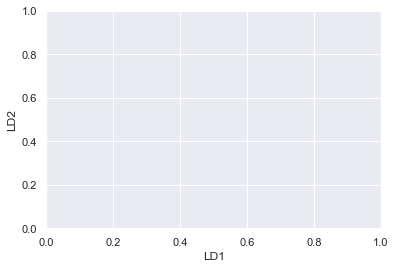

In [82]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [84]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris flower dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)

# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

## View the ratio of explained variance
lda.explained_variance_ratio_

Original number of features: 4
Reduced number of features: 1


array([0.9912])

In [88]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# Load the data
digits = datasets.load_digits()

# Standardize the feature matrix
X = StandardScaler().fit_transform(digits.data)
y =  digits.target
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 64
Reduced number of features: 54


In [93]:
lda = LinearDiscriminantAnalysis(n_components=54)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)

# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

## View the ratio of explained variance
print(lda.explained_variance_ratio_)

Original number of features: 64
Reduced number of features: 9
[0.2891 0.1826 0.1696 0.1167 0.083  0.0657 0.0431 0.0293 0.0208]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(64, 10 - 1) = 9 components.
  ChangedBehaviorWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [95]:
sum(lda.explained_variance_ratio_)

0.9999999999999999

In [17]:
df_.drop('buy_suntan?', axis=1).shape

(100, 7)

In [21]:
np.asarray(df_.drop('buy_suntan?', axis=1))

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1,

In [25]:
import tensorflow as tf
from tensorflow import keras

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)


In [53]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Embedding(100, 1, input_length=7))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(3))#, activation='sigmoid'))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be
# no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.asarray(df_.drop('buy_suntan?', axis=1))#np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
# assert output_array.shape == (32, 10, 64)
output_array.shape

(100, 3)

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=input_array.shape[1:])#,
#     keras.layers.Dense(3)
    ])

In [68]:
model.compile('rmsprop', 'mse')
output_array_ = model.predict(input_array)
# assert output_array.shape == (32, 10, 64)
output_array_.shape

(100, 3)

In [69]:
dfx = pd.DataFrame(output_array_)#.drop_duplicates()
dfx['hair_color'] = df['haircolor']
dfx.drop_duplicates()

,0,1,2,hair_color
0,0.710024,-0.748557,-0.285666,black
1,-0.436497,0.294690,0.325131,none
2,0.586755,-0.025443,0.317029,red
8,0.191005,0.753687,-0.585121,grey
9,-0.454533,0.574956,-0.742604,marron
11,-0.596687,-0.258554,-0.447850,fair
12,-0.526522,0.332875,0.448169,blond


,0,1,2,haircolor
0,-0.218256,-0.518452,0.705315,marron
1,-0.081798,-0.068073,-0.078232,fair
2,0.868897,0.130854,0.082864,blond
3,-0.154020,-0.195346,-0.468987,grey
4,-0.154020,-0.195346,-0.468987,black
5,-0.096952,-0.086958,-0.108315,red
11,-0.374408,0.792713,0.201294,none


In [66]:
input_array.shape[1:]

(7,)

In [85]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.backend.one_hot((100,1), 7)])#,
#     keras.layers.Dense(3)])#,#


input_array = np.asarray(df)#np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
output_array

TypeError: The added layer must be an instance of class Layer. Found: tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]], shape=(2, 7), dtype=float32)

In [86]:
df.shape

(100, 1)

In [87]:
input_array = np.random.randint(1000, size=(32, 10))

In [88]:
input_array.shape

(32, 10)

In [91]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(1000, 64, input_length=10))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be
# no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
assert output_array.shape == (32, 10, 64)

In [94]:
input_array


array([[143, 608, 200, 123, 186, 325, 463, 348, 770, 659],
       [763, 954, 931, 402, 345, 962, 510, 146, 147, 863],
       [710, 819, 488, 928, 935, 639, 550, 337, 871, 640],
       [778, 987, 952, 472, 945, 150, 414, 989, 297, 610],
       [262, 763, 143, 345, 623, 571, 880,   1, 896, 303],
       [253, 651, 452,  36, 159,   8, 232,  98, 658, 815],
       [207, 130, 403, 151,  53, 119, 672, 919, 627, 586],
       [624, 967, 419, 421, 103, 851, 253, 226, 111, 509],
       [472,  98, 152, 860, 913, 895, 877, 337, 705, 821],
       [162, 719, 956, 680, 995, 160, 579, 800, 397, 276],
       [815, 915, 503, 895, 391, 134, 194, 400, 639,  32],
       [687, 459, 954, 882, 469, 374,  21, 749, 669,  37],
       [229, 364, 562, 437, 775, 282,  26, 225, 276, 797],
       [608, 283, 878, 959, 480, 452, 828, 815, 658, 515],
       [546, 191,  48, 511,  16, 171, 219, 157, 476,  45],
       [372, 517,  98, 891, 744,  36, 279, 348, 496, 301],
       [180, 606,  98, 699, 992, 115, 190, 252, 980, 927